# IS 4487 Lab 4

## Outline

Repeat exercises from Lab 2, but with the *X SuperBowl* social media dataset
- Loading installed packages
- Inspect data
- Explore plot types

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab_04_social_media_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# X API Data Dictionary
See https://developer.x.com/en/docs/x-api/data-dictionary/introduction

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the X SuperBowl dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe
- Make sure you watch for line breaks and emojis that might cause problems with the data import

In [14]:
df = pd.read_csv('https://github.com/Stan-Pugsley/is_4487_base/blob/main/Labs/DataSets/x_superbowl.csv?raw=true')
df.describe()

,conversation_id,author_id,id,edit_controls.edits_remaining,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.bookmark_count,public_metrics.impression_count,in_reply_to_user_id
count,9.377000e+03,9.377000e+03,9.377000e+03,9377.000000,9377.000000,9377.000000,9377.000000,9377.000000,9377.000000,9377.000000,1.180000e+03
mean,1.756688e+18,6.452886e+17,1.756863e+18,4.995734,160.414632,0.265970,3.108883,0.057374,0.142903,493.430308,3.334129e+17
std,7.212529e+15,7.084168e+17,1.869442e+13,0.068371,617.853377,1.720208,35.093719,0.651784,2.273449,4247.759998,5.880940e+17
min,1.378505e+18,1.299700e+04,1.756825e+18,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.846000e+03
25%,1.756844e+18,2.176677e+08,1.756846e+18,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.692197e+07
50%,1.756864e+18,3.230979e+09,1.756866e+18,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.949206e+08
75%,1.756879e+18,1.380642e+18,1.756880e+18,5.000000,42.000000,0.000000,0.000000,0.000000,0.000000,252.000000,7.313111e+17
max,1.756887e+18,1.756883e+18,1.756887e+18,5.000000,4760.000000,78.000000,2043.000000,27.000000,127.000000,246031.000000,1.756813e+18


## Prepare Data

➡️ Assignment Tasks
- Convert any numbers, such as quote_count, from strings into numbers
- Reduce the variables in your dataframe to only those that have useful data
- Optional: Locate outliers in any of the variables.   Filter them out if they are mistakes; keep them if they are exceptional cases.

In [33]:
#Convert numbers
conv_cols =  [
    'public_metrics.retweet_count',
    'public_metrics.reply_count',
    'public_metrics.like_count',
    'public_metrics.quote_count',
    'public_metrics.bookmark_count',
    'public_metrics.impression_count',
]
for col in conv_cols:
    df[col] = pd.to_numeric(df[col])

#Reduce vars
red_cols = [
    'created_at',
    'username',
    'name',
    'text',
    'conversation_id',
    'possibly_sensitive',
    'lang',
    'location',
    'keyword',
    'public_metrics.retweet_count',
    'public_metrics.reply_count',
    'public_metrics.like_count',
    'public_metrics.quote_count',
    'public_metrics.bookmark_count',
    'public_metrics.impression_count'
]
red_df = df[red_cols]

#outliers
for col in ['public_metrics.retweet_count', 'public_metrics.reply_count', 'public_metrics.like_count', 'public_metrics.quote_count', 'public_metrics.bookmark_count', 'public_metrics.impression_count']:
    Q1 = red_df[col].quantile(0.25)
    Q3 = red_df[col].quantile(0.75)
    IQR = Q3 - Q1
    # define upper and lower bounds
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    #update df
    red_df = red_df[(red_df[col] >= lower_bound) & (red_df[col] <= upper_bound)]


## Summarize Data

➡️ Assignment Tasks
- Create at least two charts to summarize and visualize the data
- Examples include: Number of posts per device; top 10 keywords with highest engagement

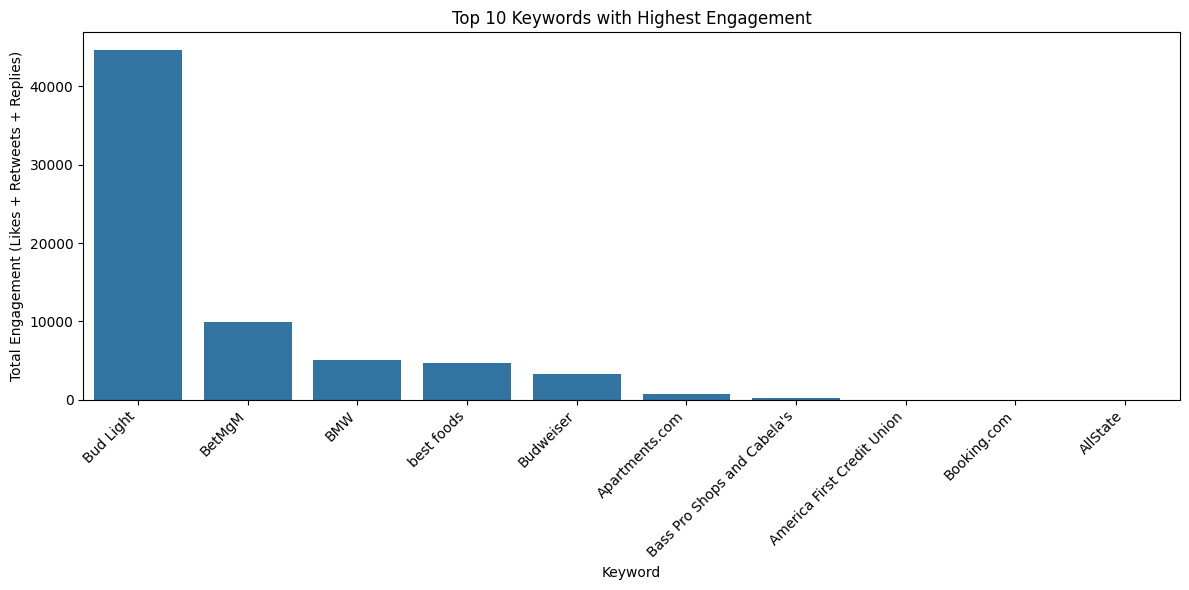

In [37]:
# Chart 1: keywords with highest engagemnet
keyword_engagement = red_df.groupby('keyword')[['public_metrics.retweet_count', 'public_metrics.reply_count', 'public_metrics.like_count']].sum().sum(axis=1).sort_values(ascending=False)[:10]

plt.figure(figsize=(12, 6))
sns.barplot(x=keyword_engagement.index, y=keyword_engagement.values)
plt.title('Top 10 Keywords with Highest Engagement')
plt.xlabel('Keyword')
plt.ylabel('Total Engagement (Likes + Retweets + Replies)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

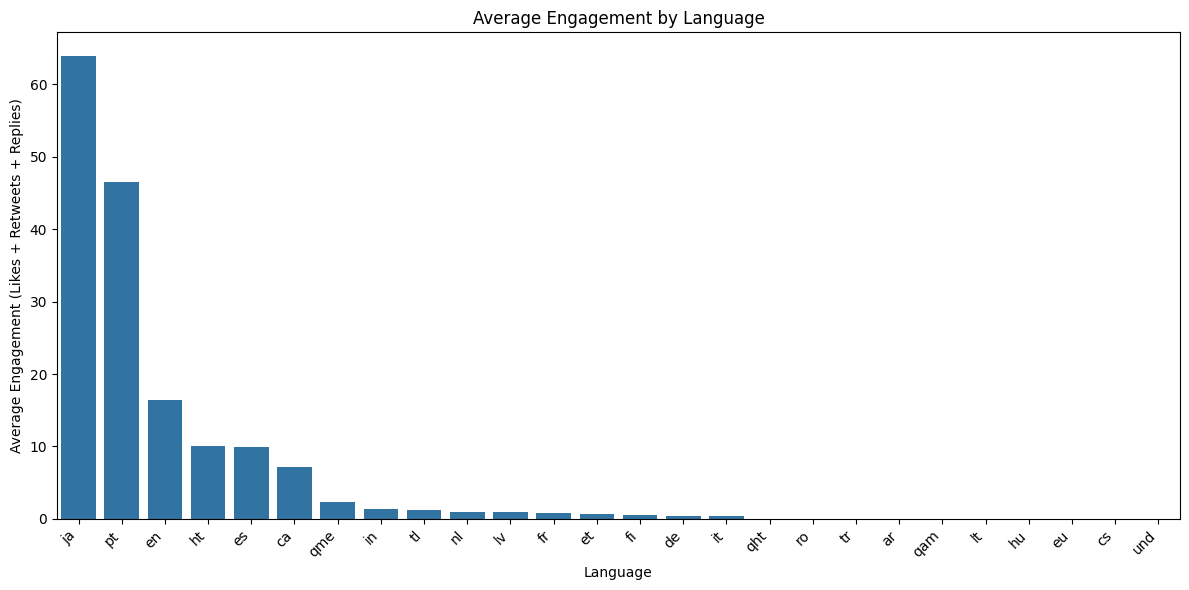

In [38]:
#Chart 2: engagement by language
lang_engagement = red_df.groupby('lang')[['public_metrics.retweet_count', 'public_metrics.reply_count', 'public_metrics.like_count']].mean().sum(axis=1).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=lang_engagement.index, y=lang_engagement.values)
plt.title('Average Engagement by Language')
plt.xlabel('Language')
plt.ylabel('Average Engagement (Likes + Retweets + Replies)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()